In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
"""N = 2
M = 5
V = -1
dt = 0.01

time_options = np.linspace(0.1, 2.5, 50)
final_J_V_ratios = np.linspace(0, 1.5, 50)
time_options_grid, final_J_V_ratios_grid = np.meshgrid(time_options, final_J_V_ratios)
probability_grid = np.zeros_like(time_options_grid)

for idx1, time_option in enumerate(time_options):
    time_array = [time_option, time_option, time_option, time_option]

    for idx2, final_J_V_ratio in enumerate(final_J_V_ratios):

        J_V_ratios = [
            [0.1, 10],  # step 1
            [10, 10],   # step 2
            [10, 2],    # step 3
            [2, final_J_V_ratio]    # step 4
        ]

        mu_V_ratios = [
            [10, 10],  # step 1
            [10, 0],   # step 2
            [0, 0],    # step 3
            [0, 0]     # step 4
        ]

        times, J_V_ratio_routine, mu_V_ratio_routine = make_linear_stepped_routines(J_V_ratios, mu_V_ratios, time_array, dt)

        adiabatic_energies, adiabatic_wavefunctions, adiabatic_probabilities, adiabatic_overlaps, true_energies = \
            simulate_adiabatic_evolution(N, M, V, mu_V_ratio_routine, J_V_ratio_routine, times, dt=dt, initial_state=None)
            
        probability_grid[idx2, idx1] = adiabatic_probabilities[-1, 0]
"""

'N = 2\nM = 5\nV = -1\ndt = 0.01\n\ntime_options = np.linspace(0.1, 2.5, 50)\nfinal_J_V_ratios = np.linspace(0, 1.5, 50)\ntime_options_grid, final_J_V_ratios_grid = np.meshgrid(time_options, final_J_V_ratios)\nprobability_grid = np.zeros_like(time_options_grid)\n\nfor idx1, time_option in enumerate(time_options):\n    time_array = [time_option, time_option, time_option, time_option]\n\n    for idx2, final_J_V_ratio in enumerate(final_J_V_ratios):\n\n        J_V_ratios = [\n            [0.1, 10],  # step 1\n            [10, 10],   # step 2\n            [10, 2],    # step 3\n            [2, final_J_V_ratio]    # step 4\n        ]\n\n        mu_V_ratios = [\n            [10, 10],  # step 1\n            [10, 0],   # step 2\n            [0, 0],    # step 3\n            [0, 0]     # step 4\n        ]\n\n        times, J_V_ratio_routine, mu_V_ratio_routine = make_linear_stepped_routines(J_V_ratios, mu_V_ratios, time_array, dt)\n\n        adiabatic_energies, adiabatic_wavefunctions, adiabatic_

In [3]:
"""plt.pcolormesh(time_options_grid, final_J_V_ratios_grid, probability_grid, shading = "auto", cmap = "plasma", vmin = 0, vmax = 1)
plt.colorbar(label="Ground State Probability")
plt.xlabel("$T/4$")
plt.ylabel("$J/|V|$")
plt.title("Lower Bound Probability Grid")
plt.xlim(0,1.6)"""

'plt.pcolormesh(time_options_grid, final_J_V_ratios_grid, probability_grid, shading = "auto", cmap = "plasma", vmin = 0, vmax = 1)\nplt.colorbar(label="Ground State Probability")\nplt.xlabel("$T/4$")\nplt.ylabel("$J/|V|$")\nplt.title("Lower Bound Probability Grid")\nplt.xlim(0,1.6)'

Completed calculation for time_option: 0.1, final_J_V_ratio: 0.75, probability: 0.0316
Completed calculation for time_option: 0.1, final_J_V_ratio: 0.1875, probability: 0.0200
Completed calculation for time_option: 0.1, final_J_V_ratio: 1.1875, probability: 0.0343
Completed calculation for time_option: 0.1, final_J_V_ratio: 0.875, probability: 0.0326
Completed calculation for time_option: 0.1, final_J_V_ratio: 0.375, probability: 0.0260
Completed calculation for time_option: 0.1, final_J_V_ratio: 0.625, probability: 0.0302
Completed calculation for time_option: 0.1, final_J_V_ratio: 0.8125, probability: 0.0321Completed calculation for time_option: 0.1, final_J_V_ratio: 0.6875, probability: 0.0309

Completed calculation for time_option: 0.1, final_J_V_ratio: 0.3125, probability: 0.0244
Completed calculation for time_option: 0.1, final_J_V_ratio: 0.5625, probability: 0.0294
Completed calculation for time_option: 0.1, final_J_V_ratio: 1.0625, probability: 0.0337
Completed calculation for 

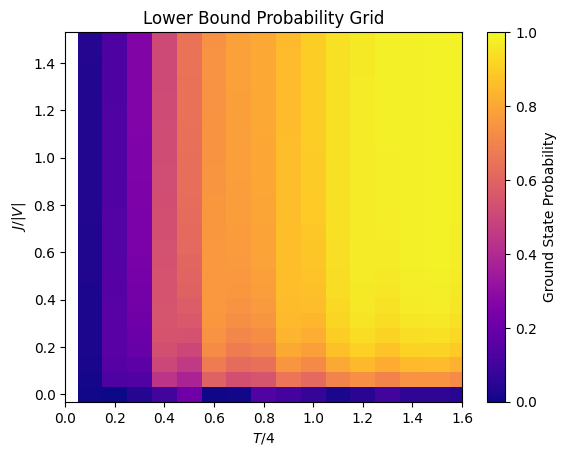

In [4]:
from concurrent.futures import ThreadPoolExecutor

N = 2
M = 5
V = -1
dt = 0.01

time_options = np.linspace(0.1, 2.5, 25)
final_J_V_ratios = np.linspace(0, 1.5, 25)
time_options_grid, final_J_V_ratios_grid = np.meshgrid(time_options, final_J_V_ratios)
probability_grid = np.zeros_like(time_options_grid)

def calculate_probability(time_option, final_J_V_ratio):
    time_array = [time_option, time_option, time_option, time_option]

    J_V_ratios = [
        [0.1, 10],  # step 1
        [10, 10],   # step 2
        [10, 2],    # step 3
        [2, final_J_V_ratio]  # step 4
    ]

    mu_V_ratios = [
        [10, 10],  # step 1
        [10, 0],   # step 2
        [0, 0],    # step 3
        [0, 0]     # step 4
    ]

    times, J_V_ratio_routine, mu_V_ratio_routine = make_linear_stepped_routines(J_V_ratios, mu_V_ratios, time_array, dt)

    adiabatic_energies, adiabatic_wavefunctions, adiabatic_probabilities, adiabatic_overlaps, true_energies = \
        simulate_adiabatic_evolution(N, M, V, mu_V_ratio_routine, J_V_ratio_routine, times, dt=dt, initial_state=None)
    
    probability = adiabatic_probabilities[-1, 0]
    print(f"Completed calculation for time_option: {time_option}, final_J_V_ratio: {final_J_V_ratio}, probability: {probability:.4f}")
    return (time_option, final_J_V_ratio, probability)

# Run the calculations in parallel
with ThreadPoolExecutor() as executor:
    futures = []
    for time_option in time_options:
        for final_J_V_ratio in final_J_V_ratios:
            futures.append(executor.submit(calculate_probability, time_option, final_J_V_ratio))

    for future in futures:
        time_option, final_J_V_ratio, probability = future.result()
        idx1 = np.where(time_options == time_option)[0][0]
        idx2 = np.where(final_J_V_ratios == final_J_V_ratio)[0][0]
        probability_grid[idx2, idx1] = probability

# Plotting
plt.pcolormesh(time_options_grid, final_J_V_ratios_grid, probability_grid, shading="auto", cmap="plasma", vmin=0, vmax=1)
plt.colorbar(label="Ground State Probability")
plt.xlabel("$T/4$")
plt.ylabel("$J/|V|$")
plt.title("Lower Bound Probability Grid")
plt.xlim(0, 1.6)
plt.show()


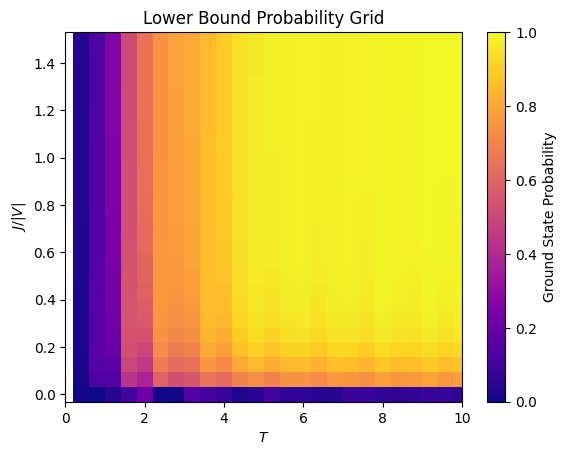

In [7]:
# Exaggerate the time axis by a factor of 4
exaggerated_time_options_grid = time_options_grid * 4

# Plotting
plt.pcolormesh(exaggerated_time_options_grid, final_J_V_ratios_grid, probability_grid, shading="auto", cmap="plasma", vmin=0, vmax=1)
plt.colorbar(label="Ground State Probability")
plt.xlabel("$T$")
plt.ylabel("$J/|V|$")
plt.title("Lower Bound Probability Grid")
plt.xlim(0, 4 * 2.5)  # Adjust xlim to match the exaggerated scale
plt.show()
